In [1]:

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
file_input_city_csv = "generated_data/city_data.csv"
file_input_rides_csv = "generated_data/ride_data.csv"

In [3]:

city_df = pd.read_csv(file_input_city_csv)
city_df.head()


,city,driver_count,type
0,Lake Ambermouth,29,Urban
1,Danielton,5,Urban
2,Nicholasshire,18,Urban
3,Owensburgh,55,Urban
4,New Alexandrastad,5,Urban


In [4]:
rides_df = pd.read_csv(file_input_rides_csv)
rides_df.head()

,city,date,fare,ride_id
0,Moralesmouth,2018-02-18 08:26:55,16.92,809189561605
1,South Douglasport,2018-02-14 17:35:55,24.01,185005986938
2,Roseshire,2018-01-14 14:08:37,9.14,6116304082209
3,Meyerstad,2018-01-24 19:15:23,11.46,2313840895285
4,Laurafort,2018-01-18 07:56:00,34.91,7956887386900


In [5]:
group_by_city_rides_df = rides_df.groupby('city')


In [6]:
rides_count_per_city = group_by_city_rides_df.ride_id.count()
rides_count_per_city.head()

city
Alanton        8
Alicemouth    17
Annshire      26
Arthurland    19
Berryland     28
Name: ride_id, dtype: int64

In [7]:
avg_fare_per_city = group_by_city_rides_df.fare.mean()
avg_fare_per_city.head()

city
Alanton       31.313750
Alicemouth    28.145882
Annshire      23.280769
Arthurland    31.851579
Berryland     25.701071
Name: fare, dtype: float64

In [8]:
second_city_df = pd.concat((rides_count_per_city,avg_fare_per_city),axis=1)
second_city_df = second_city_df.rename(columns={'ride_id':'ride_count','fare':'avg_fare'})
second_city_df.head()

,ride_count,avg_fare
city,,
Alanton,8,31.313750
Alicemouth,17,28.145882
Annshire,26,23.280769
Arthurland,19,31.851579
Berryland,28,25.701071


In [9]:
second_city_df = second_city_df.reset_index()
second_city_df.head()

,city,ride_count,avg_fare
0,Alanton,8,31.313750
1,Alicemouth,17,28.145882
2,Annshire,26,23.280769
3,Arthurland,19,31.851579
4,Berryland,28,25.701071


In [10]:
final_df = pd.merge(city_df,second_city_df,how='inner')
final_df.head()

,city,driver_count,type,ride_count,avg_fare
0,Lake Ambermouth,29,Urban,28,22.513929
1,Danielton,5,Urban,27,24.950741
2,Nicholasshire,18,Urban,21,21.321429
3,Owensburgh,55,Urban,23,23.117391
4,New Alexandrastad,5,Urban,25,26.236000


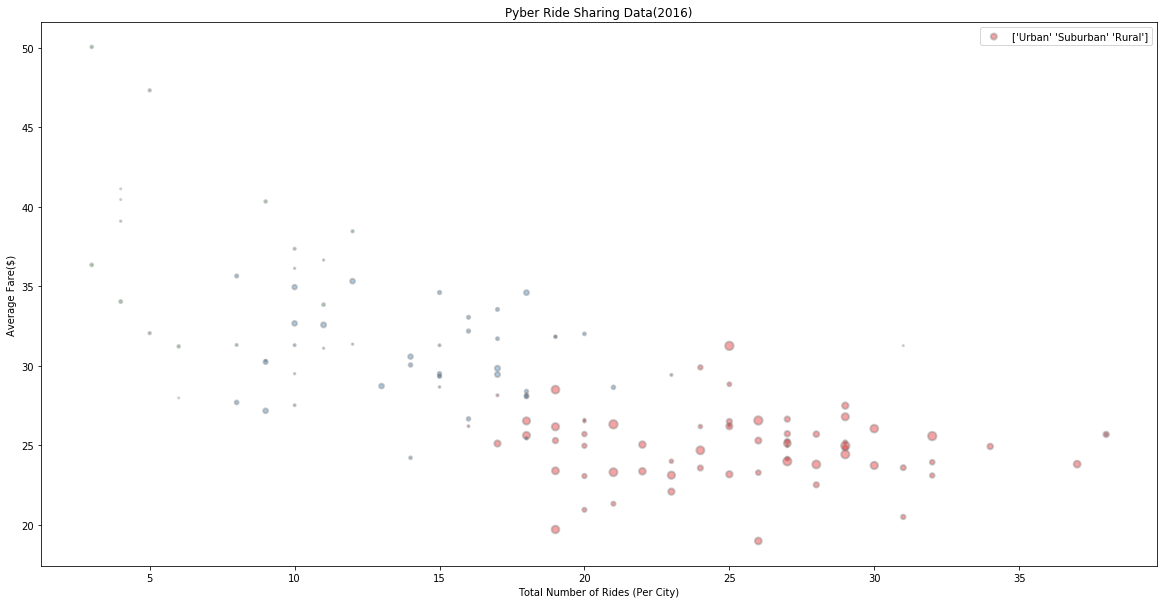

In [11]:
color_labels = final_df['type'].unique()
# List of RGB triplets
rgb_values = sns.color_palette("Set1", 3)
# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

final_df.plot.scatter(x='ride_count',y='avg_fare',s=final_df['driver_count'], 
                      c=final_df['type'].map(color_map),alpha=0.4,edgecolors='grey',
                      linewidth=2,figsize=(20,10),label=final_df['type'].unique())

# Add titles (main and on axis)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data(2016)")

plt.legend(loc="upper right", fancybox=True)

plt.show()


In [12]:
final_df.head()

,city,driver_count,type,ride_count,avg_fare
0,Lake Ambermouth,29,Urban,28,22.513929
1,Danielton,5,Urban,27,24.950741
2,Nicholasshire,18,Urban,21,21.321429
3,Owensburgh,55,Urban,23,23.117391
4,New Alexandrastad,5,Urban,25,26.236000


In [13]:
final_df['total_fare'] = final_df['ride_count']*final_df['avg_fare']
final_df.head()

,city,driver_count,type,ride_count,avg_fare,total_fare
0,Lake Ambermouth,29,Urban,28,22.513929,630.39
1,Danielton,5,Urban,27,24.950741,673.67
2,Nicholasshire,18,Urban,21,21.321429,447.75
3,Owensburgh,55,Urban,23,23.117391,531.70
4,New Alexandrastad,5,Urban,25,26.236000,655.90


In [14]:
total_fare_per_city_type = final_df.groupby('type').total_fare.sum()
total_fare_per_city_type

type
Rural        4450.07
Suburban    19689.77
Urban       40785.84
Name: total_fare, dtype: float64

([<matplotlib.patches.Wedge at 0x1f146aef390>,
 [Text(-0.256401,1.17229,'Rural'),
  Text(-1.08074,0.204937,'Suburban'),
  Text(1.01199,-0.431124,'Urban')],
 [Text(-0.149567,0.683834,'6.9%'),
  Text(-0.589495,0.111784,'30.3%'),
  Text(0.551997,-0.235158,'62.8%')])

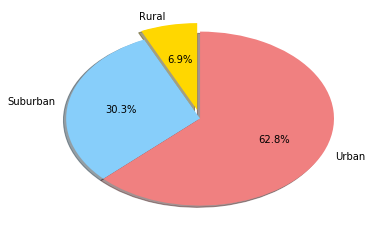

In [15]:
labels = ["Rural", "Suburban", "Urban"]
sizes = total_fare_per_city_type
colors = ["Gold", "lightskyBlue", "lightCoral"]
explode = (0.1, 0, 0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)

In [16]:
total_ride_per_city_type = final_df.groupby('type').ride_count.sum()
total_ride_per_city_type

type
Rural        125
Suburban     651
Urban       1637
Name: ride_count, dtype: int64

([<matplotlib.patches.Wedge at 0x1f146b42c18>,
 [Text(-0.194431,1.18414,'Rural'),
  Text(-1.01413,0.426073,'Suburban'),
  Text(0.931696,-0.584759,'Urban')],
 [Text(-0.113418,0.690751,'5.2%'),
  Text(-0.553162,0.232404,'27.0%'),
  Text(0.508198,-0.318959,'67.8%')])

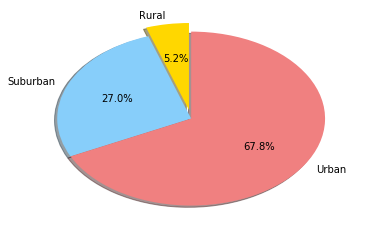

In [17]:
labels = ["Rural", "Suburban", "Urban"]
sizes = total_ride_per_city_type
colors = ["Gold", "lightskyBlue", "lightCoral"]
explode = (0.1, 0, 0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)

In [18]:
total_driver_per_city_type = final_df.groupby('type').driver_count.sum()
total_driver_per_city_type

type
Rural         85
Suburban     524
Urban       2405
Name: driver_count, dtype: int64

([<matplotlib.patches.Wedge at 0x1f146b9b240>,
 [Text(-0.106179,1.19529,'Rural'),
  Text(-0.728114,0.82453,'Suburban'),
  Text(0.652301,-0.885722,'Urban')],
 [Text(-0.0619377,0.697254,'2.8%'),
  Text(-0.397153,0.449744,'17.4%'),
  Text(0.355801,-0.483121,'79.8%')])

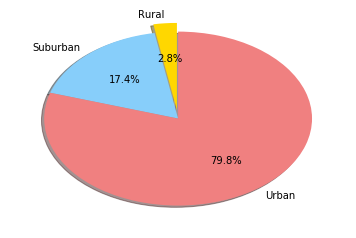

In [19]:
labels = ["Rural", "Suburban", "Urban"]
sizes = total_driver_per_city_type
colors = ["Gold", "lightskyBlue", "lightCoral"]
explode = (0.1, 0, 0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)